# Image classification from scratch


**Description:** Training an image classifier from scratch on the Kaggle Cats vs Dogs dataset.

* Dataset: Kaggle Cats vs Dogs dataset (a binary classification problem).

* Goal: Train a neural network from scratch (not using pre-trained models).

* data loading → preprocessing → model creation → training → evaluation

## Introduction

This example shows how to do image classification from scratch, starting from JPEG
image files on disk, without leveraging pre-trained weights or a pre-made Keras
Application model. We demonstrate the workflow on the Kaggle Cats vs Dogs binary
classification dataset.

We use the `image_dataset_from_directory` utility to generate the datasets, and
we use Keras image preprocessing layers for image standardization and data augmentation.

In [48]:
!pip install keras

!pip install tensorflow

## Setup

In [49]:
import os
import numpy as np
import keras                                    #Build the neural network.
from keras import layers
from tensorflow import data as tf_data          #Efficient dataset pipelines.
import matplotlib.pyplot as plt






## Load the data: the Cats vs Dogs dataset

### Raw data download

First, let's download the 786M ZIP archive of the raw data:

In [50]:


!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip




  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0   145M      0  0:00:05  0:00:05 --:--:--  157M


In [51]:
# check the file is 100 % downloaded

!echo $?


# output = 0 ---- 100% downloaded
#        = 1  or 127 ----- error in download


0


In [52]:
#kist the size of file



!ls -lh *.zip


-rw-r--r-- 1 root root 787M Aug 21 07:21 kagglecatsanddogs_5340.zip


In [53]:


!unzip -q kagglecatsanddogs_5340.zip


!echo "extract completed !!!!!!!!!!!!! "

replace PetImages/Cat/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: All
extract completed !!!!!!!!!!!!! 


Now we have a `PetImages` folder which contain two subfolders, `Cat` and `Dog`. Each
subfolder contains image files for each category.

In [54]:
!du -sh  PetImages*

876M	PetImages


In [55]:
!du -sh  PetImages/Dog

!du -sh  PetImages/Cat/

477M	PetImages/Dog
400M	PetImages/Cat/


In [56]:
!find PetImages/Dog/ -type f | wc -l


12501


In [57]:
!find PetImages/Cat -type f | wc -l


12501


In [59]:



# Delete 70% of files in Dog folder
!total=$(find PetImages/Dog/ -type f | wc -l); \
del_count=$(( total * 70 / 100 )); \
echo "Dog - Total files: $total"; \
echo "Dog - Deleting: $del_count files (70%)"; \
find PetImages/Dog/ -type f -print0 | shuf -z | head -z -n "$del_count" | xargs -0 rm -f

# Delete 70% of files in Cat folder
!total=$(find PetImages/Cat/ -type f | wc -l); \
del_count=$(( total * 70 / 100 )); \
echo "Cat - Total files: $total"; \
echo "Cat - Deleting: $del_count files (70%)"; \
find PetImages/Cat/ -type f -print0 | shuf -z | head -z -n "$del_count" | xargs -0 rm -f





Dog - Total files: 12501
Dog - Deleting: 8750 files (70%)
Cat - Total files: 12501
Cat - Deleting: 8750 files (70%)


In [60]:
!find PetImages/Dog/ -type f | wc -l

3751


In [61]:
!find PetImages/Cat -type f | wc -l

3751


In [ ]:
# Count total files
!total=$(find PetImages/Cat/ -type f | wc -l); \
del_count=$(( total * 70 / 100 )); \
echo "Total files: $total"; \
echo "Deleting: $del_count files (70%)"; \
find PetImages/Dog/ -type f -print0 | shuf -z | head -z -n "$del_count" | xargs -0 rm -f


Total files: 12501
Deleting: 8750 files (70%)


In [ ]:
!find PetImages/Cat -type f | wc -l


12501


In [62]:
!ls -R PetImages/Dog/

PetImages/Dog/:
10012.jpg  11599.jpg  191.jpg	3448.jpg  5045.jpg  6753.jpg  8435.jpg
10013.jpg  115.jpg    1925.jpg	3449.jpg  5046.jpg  6754.jpg  8443.jpg
10015.jpg  11600.jpg  1932.jpg	3450.jpg  5047.jpg  6755.jpg  8447.jpg
10016.jpg  11607.jpg  1933.jpg	3455.jpg  5049.jpg  6756.jpg  8448.jpg
10020.jpg  11608.jpg  1934.jpg	345.jpg   504.jpg   6757.jpg  844.jpg
10021.jpg  1160.jpg   1937.jpg	3460.jpg  5053.jpg  6759.jpg  8451.jpg
10024.jpg  11610.jpg  1939.jpg	3462.jpg  5057.jpg  675.jpg   8455.jpg
10025.jpg  11611.jpg  193.jpg	3466.jpg  5058.jpg  6768.jpg  8458.jpg
10026.jpg  11612.jpg  1948.jpg	3467.jpg  5059.jpg  676.jpg   8461.jpg
10028.jpg  11614.jpg  1949.jpg	3477.jpg  5063.jpg  6772.jpg  8464.jpg
10029.jpg  11615.jpg  1952.jpg	3479.jpg  5066.jpg  6774.jpg  8465.jpg
10032.jpg  11616.jpg  1954.jpg	3481.jpg  5073.jpg  6777.jpg  8467.jpg
10034.jpg  11618.jpg  1956.jpg	3489.jpg  5076.jpg  6781.jpg  8469.jpg
10036.jpg  11622.jpg  1958.jpg	3493.jpg  507.jpg   6784.jpg  8474.jpg
10039.j

**Dataset Loading**

* The notebook downloads the Cats vs Dogs dataset (786 MB ZIP file) from Kaggle/Microsoft.

* It then extracts images into folders (likely cats/ and dogs/).

* After extraction, it uses keras.utils.image_dataset_from_directory to load images into TensorFlow datasets.

# **the next steps will usually be:**


---


* Splitting data → training & validation sets.

* Preprocessing → resizing, scaling pixels, augmentation.

* Model building → defining CNN layers.

* Training → fit the model with data.

* Evaluation → accuracy, loss curves, test performance.

### Filter out corrupted images



---



---



When working with lots of real-world image data, corrupted images are a common
occurence. Let's filter out badly-encoded images that do not feature the string "JFIF"
in their header.

This snippet goes through all Cat and Dog images, checks if they are valid JPEGs, and deletes the corrupted ones. Without this, your model training might crash when it encounters unreadable images.

In [63]:
num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = b"JFIF" in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print(f"Deleted {num_skipped} images.")

Deleted 463 images.


## Generate a `Dataset`

This step loads the dataset from folders, resizes, batches, and splits it into training & validation sets — ready for preprocessing and training.

What Happens After This?







* train_ds = 80% of images (for training).

* val_ds = 20% of images (for validation).

* Both are tf.data.Dataset objects that yield (images, labels) pairs:

* images → Tensor of shape (batch_size, 180, 180, 3)

* labels → Tensor of shape (batch_size,) with values 0 (Cat) or 1 (Dog).

In [64]:
image_size = (180, 180)
batch_size = 128

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,             #Reserves 20% of images for validation set, rest for training.
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 7039 files belonging to 2 classes.
Using 5632 files for training.
Using 1407 files for validation.


## Visualize the data

Here are the first 9 images in the training dataset.

This block visualizes sample training images with their labels to confirm the dataset was loaded correctly.

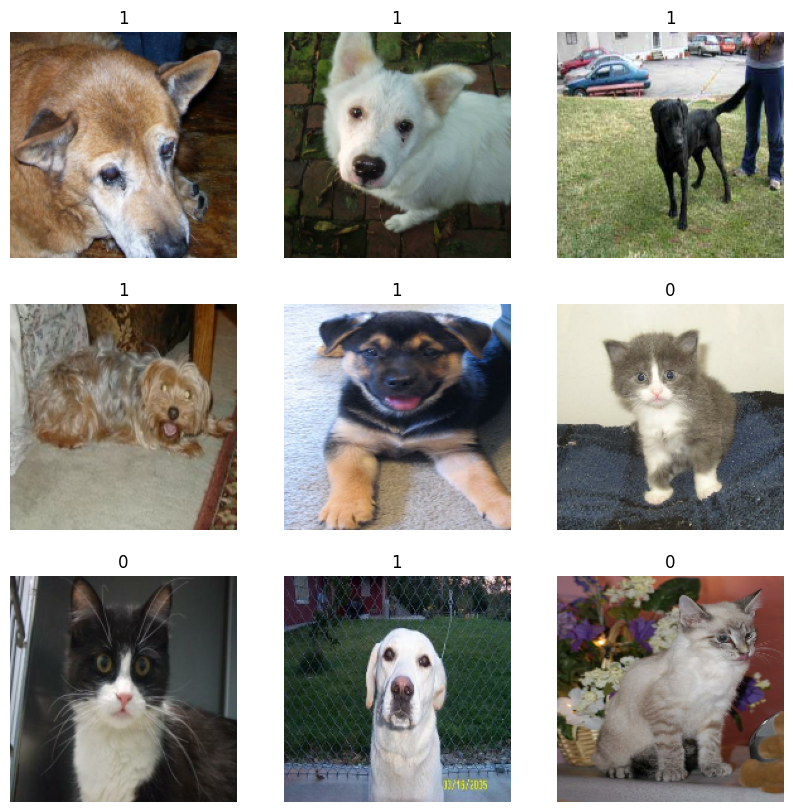

In [65]:

plt.figure(figsize=(10, 10))


for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

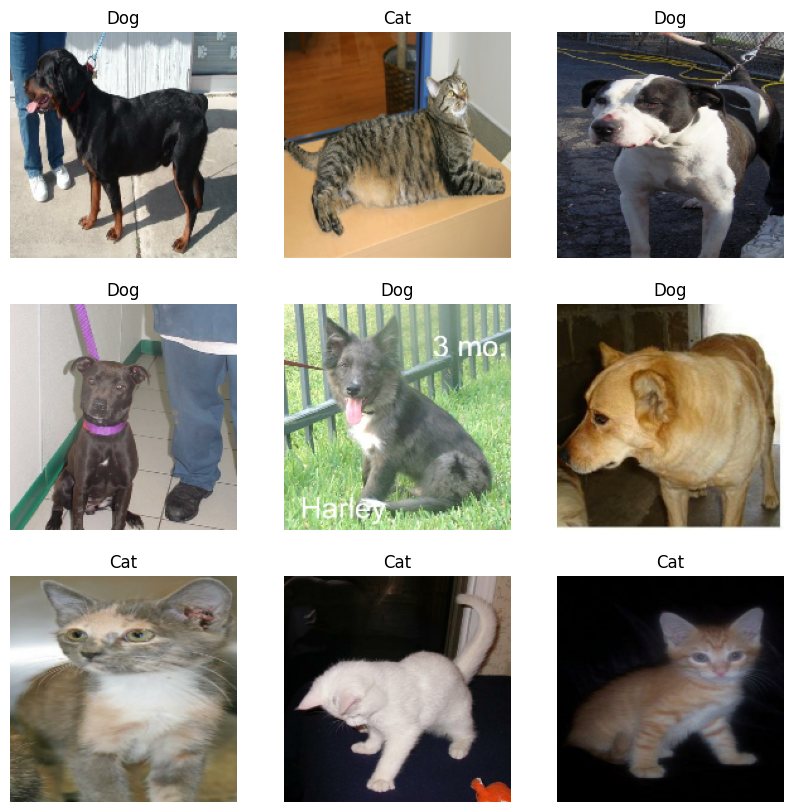

In [66]:
#alternative via name for pets insted 0 and 1





# Class names (order comes from folder names)
class_names = train_ds.class_names  # ["Cat", "Dog"]

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(class_names[labels[i]])  # show "Cat" or "Dog"
        plt.axis("off")


## Using image data augmentation

When you don't have a large image dataset, it's a good practice to artificially
introduce sample diversity by applying random yet realistic transformations to the
training images, such as random horizontal flipping or small random rotations. This
helps expose the model to different aspects of the training data while slowing down
overfitting.

In [67]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images


**Why Data Augmentation?**

* Deep learning models need lots of diverse data to generalize well.

* If you train only on the original images, the model might memorize instead of learning patterns → overfitting.

* Data augmentation = generate slightly different versions of images on the fly (during training).

* This increases dataset diversity without actually collecting more images.

Let's visualize what the augmented samples look like, by applying `data_augmentation`
repeatedly to the first few images in the dataset:

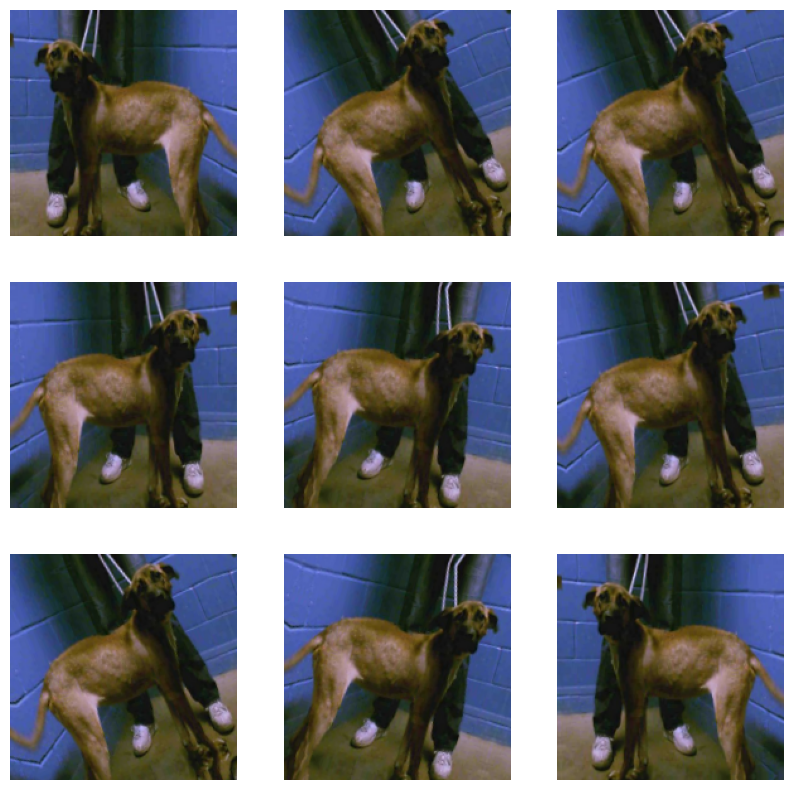

In [68]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")


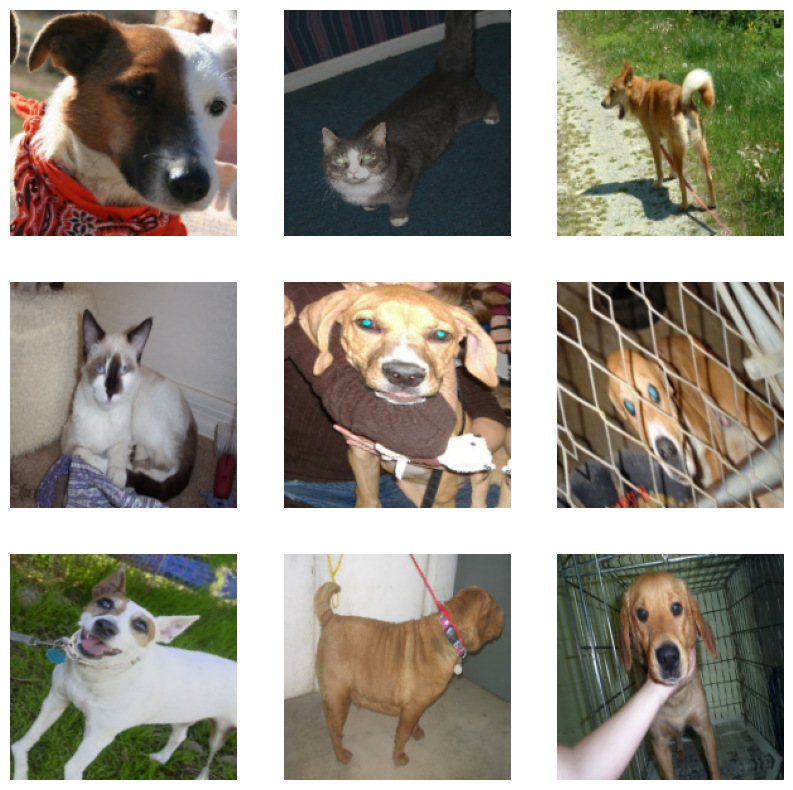

In [69]:
# OR do...........




#This will show 9 random augmentations of the same batch,
# e.g. cats flipped left/right, dogs slightly rotated, etc.




# Show 9 augmented images

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):   # take one batch
    augmented_images = data_augmentation(images)  # apply augmentation
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[i]).astype("uint8"))
        plt.axis("off")
    break


* Data augmentation increases dataset variety artificially.

* Helps prevent overfitting.

* In this case: horizontal flips + small rotations.

* Applied dynamically during training → each epoch may see different variations.

## Standardizing the data



---



---



Our image are already in a standard size (180x180), as they are being yielded as
contiguous `float32` batches by our dataset. However, their RGB channel values are in
the `[0, 255]` range. This is not ideal for a neural network;
in general you should seek to make your input values small. Here, we will
standardize values to be in the `[0, 1]` by using a `Rescaling` layer at the start of
our model.

**Why Standardize?**

* Images are loaded with pixel values in the range [0, 255].

* Neural networks work best when inputs are small and centered (e.g. [0,1] or [-1,1]).

* Standardization improves:
  * Numerical stability (avoids exploding gradients).
  * Training speed (optimizers converge faster).

## Two options to preprocess the data

There are two ways you could be using the `data_augmentation` preprocessor:

**Option 1: Make it part of the model**, like this:

```python
inputs = keras.Input(shape=input_shape)
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
...  # Rest of the model
```

With this option, your data augmentation will happen *on device*, synchronously
with the rest of the model execution, meaning that it will benefit from GPU
acceleration.

Note that data augmentation is inactive at test time, so the input samples will only be
augmented during `fit()`, not when calling `evaluate()` or `predict()`.




* If you're training on GPU, this may be a good option.
* Runs on GPU together with training.
* Advantage: GPU acceleration, clean pipeline.
* Limitation: Augmentation happens synchronously, so your GPU may sometimes wait for augmentation to finish.
*⚡ Recommended if: you’re training on GPU.

---


**Option 2: apply it to the dataset**, so as to obtain a dataset that yields batches of
augmented images, like this:

```python
augmented_train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y))
```

With this option, your data augmentation will happen **on CPU**, asynchronously, and will
be buffered before going into the model.

If you're training on CPU, this is the better option, since it makes data augmentation
asynchronous and non-blocking.

In our case, we'll go with the second option. If you're not sure
which one to pick, this second option (asynchronous preprocessing) is always a solid choice.




* Applies augmentation before feeding into the model.

* Runs on CPU (separate process), and augmented images are buffered in advance.

* Advantage: asynchronous preprocessing → GPU stays busy training, no waiting.

* Limitation: Uses more RAM since preprocessed batches are buffered.

* ⚡ Recommended if: you’re training on CPU, or want more control over preprocessing.

## Configure the dataset for performance

Let's apply data augmentation to our training dataset,
and let's make sure to use buffered prefetching so we can yield data from disk without
having I/O becoming blocking:

In [70]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf_data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf_data.AUTOTUNE)
val_ds = val_ds.prefetch(tf_data.AUTOTUNE)

## Build a model


---



---


We'll build a small version of the Xception network. We haven't particularly tried to
optimize the architecture; if you want to do a systematic search for the best model
configuration, consider using
[KerasTuner](https://github.com/keras-team/keras-tuner).

Note that:

- We start the model with the `data_augmentation` preprocessor, followed by a
 `Rescaling` layer.
- We include a `Dropout` layer before the final classification layer.

In [71]:


#Define the Model Function





def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Residual blocks
    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(previous_block_activation)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Final layers
    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)

    if num_classes == 2:
        units = 1
    else:
        units = num_classes

    x = layers.Dropout(0.25)(x)
    outputs = layers.Dense(units, activation=None)(x)  # logits
    return keras.Model(inputs, outputs)


In [72]:



#Specify Input Size and Number of Classes




# Example image size
image_size = (180, 180)
num_classes = 2




In [73]:


# Create the Model

model = make_model(input_shape=image_size + (3,), num_classes=num_classes)




In [74]:
!pip install pydot

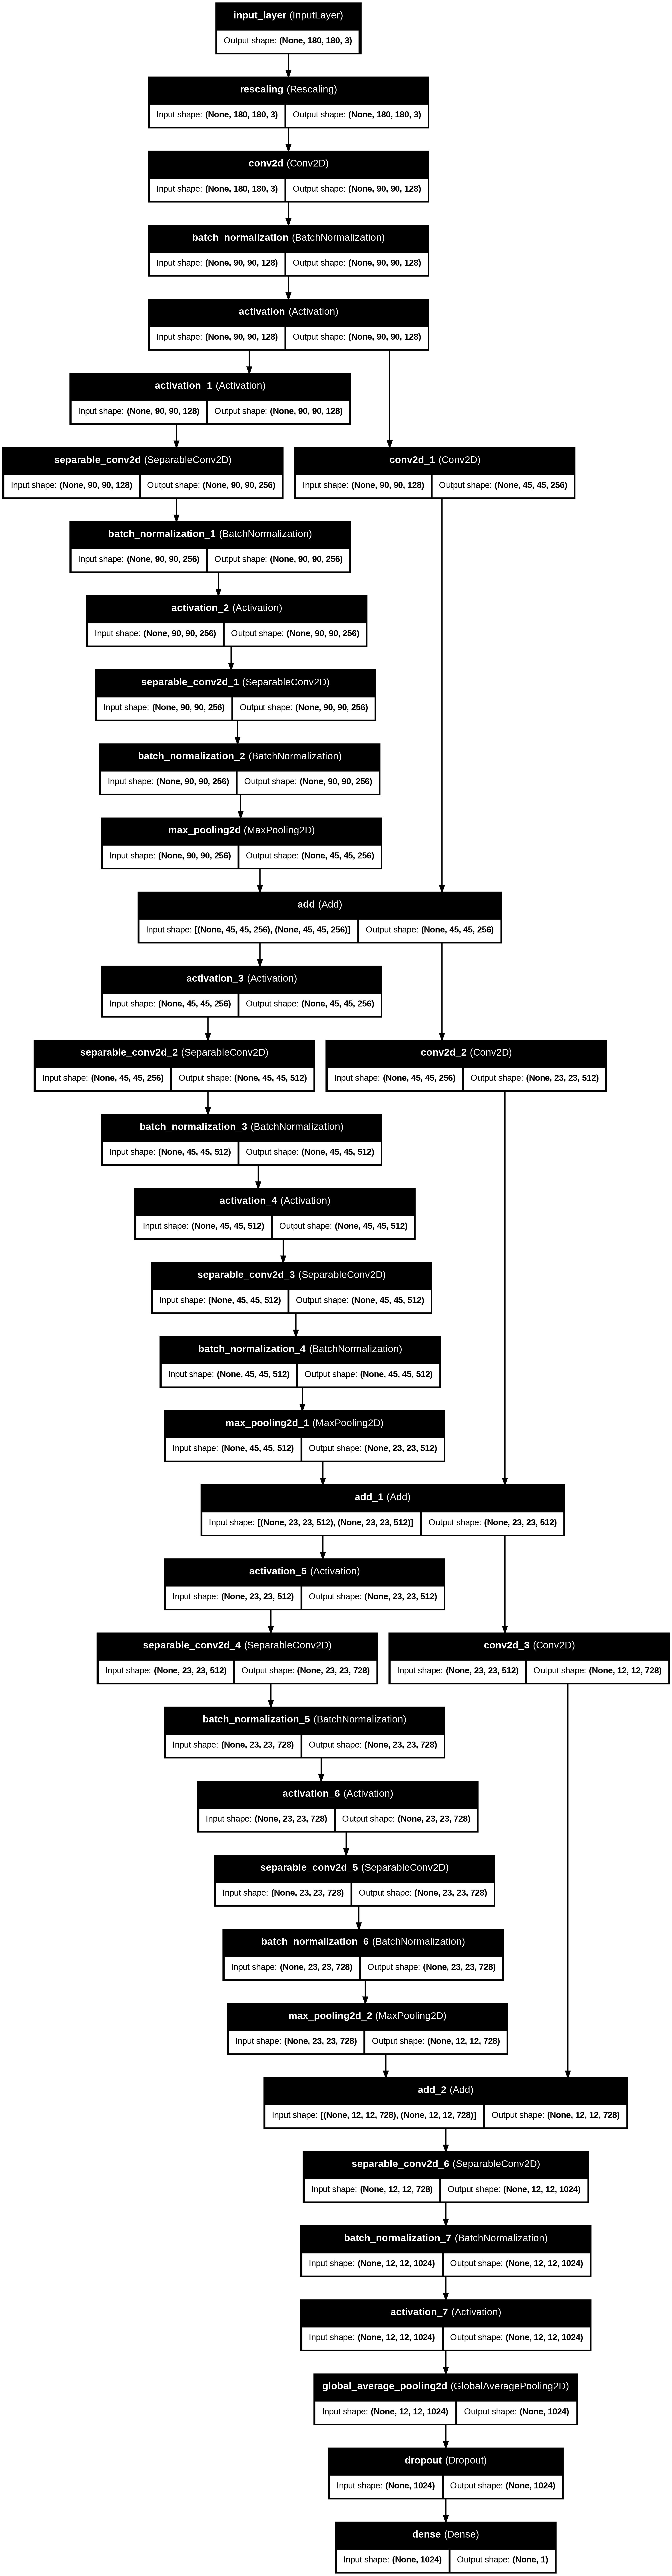

In [75]:



#Visualize the Model



keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)


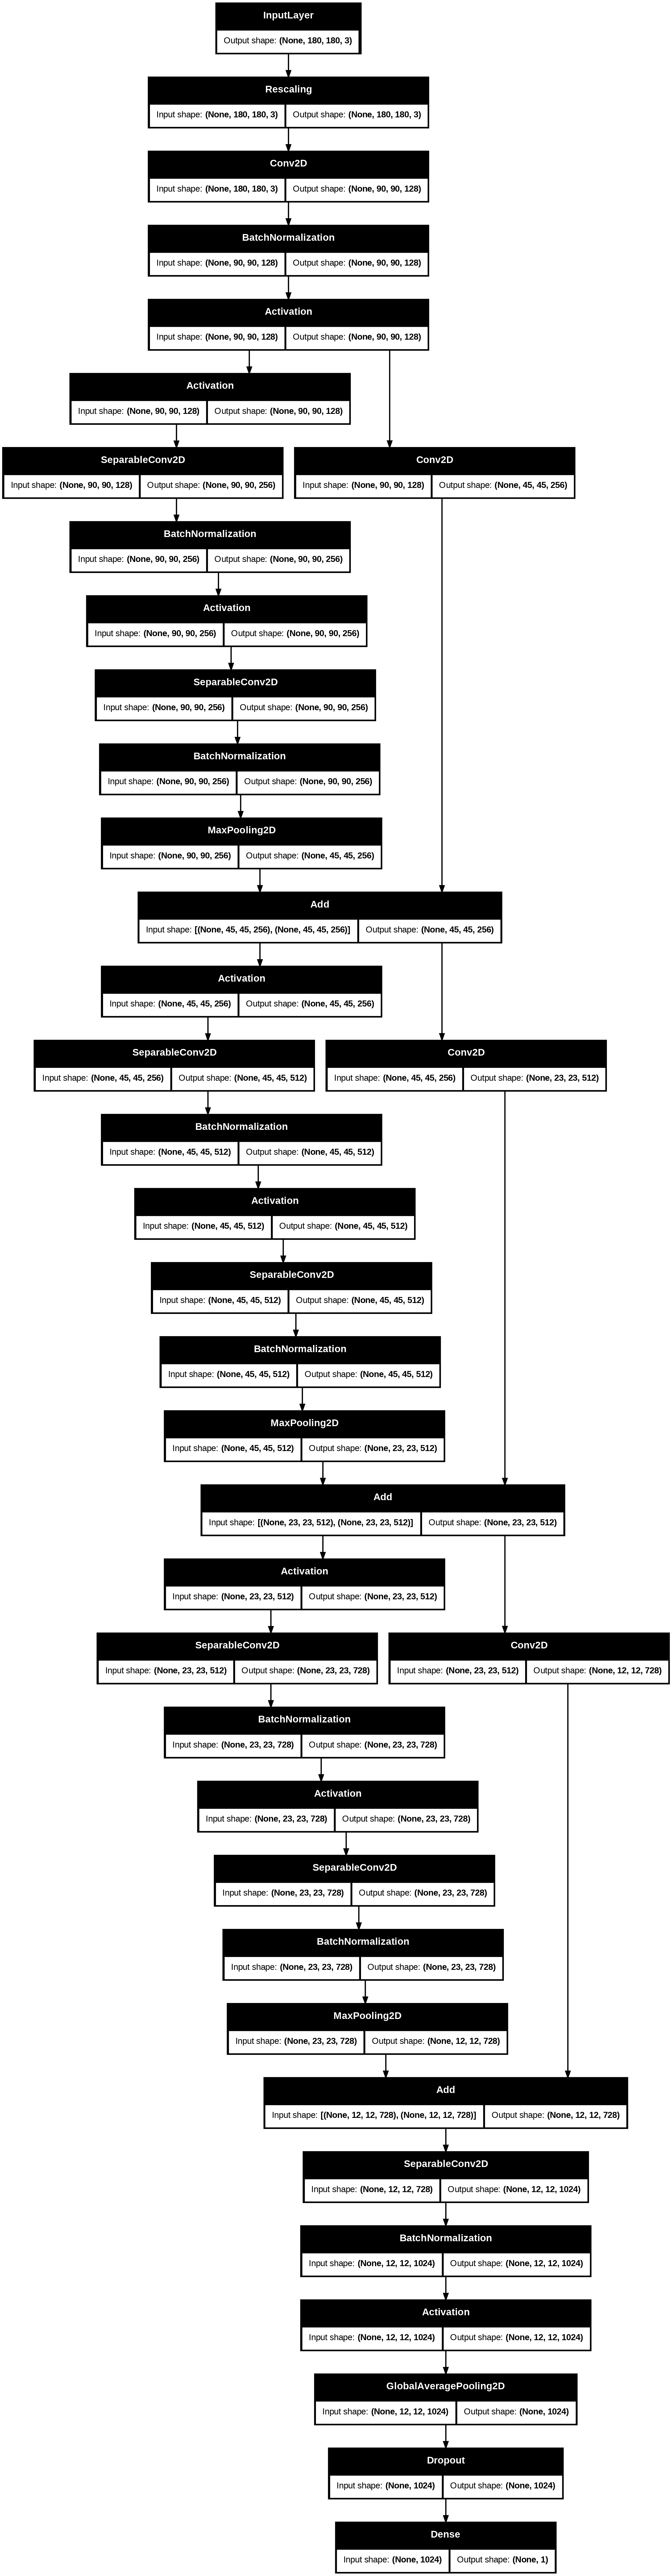

In [ ]:

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        units = 1
    else:
        units = num_classes

    x = layers.Dropout(0.25)(x)
    # We specify activation=None so as to return logits
    outputs = layers.Dense(units, activation=None)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
!pip install pydot

**Summary:**

* This is a deep CNN with residual connections, inspired by Xception-style architecture.

* It uses SeparableConv2D, BatchNorm, ReLU, GlobalAveragePooling, and Dropout.

* Suitable for binary or multi-class image classification.

## Train the model

---



---



In [ ]:

#epochs = 2 → This is just for demonstration;
#for real training, you usually use more epochs (10–50+).


epochs = 20            ## Number of times the model will go through the entire dataset

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(
    optimizer=keras.optimizers.Adam(3e-4),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy(name="acc")],
)
model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - acc: 0.8893 - loss: 0.2579 - val_acc: 0.5849 - val_loss: 0.6849
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - acc: 0.8900 - loss: 0.2387 - val_acc: 0.5586 - val_loss: 0.6710
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - acc: 0.8973 - loss: 0.2269 - val_acc: 0.5515 - val_loss: 0.6883
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - acc: 0.9068 - loss: 0.2127 - val_acc: 0.5345 - val_loss: 0.8445
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - acc: 0.9136 - loss: 0.2058 - val_acc: 0.5544 - val_loss: 0.8253
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - acc: 0.9090 - loss: 0.1972 - val_acc: 0.5977 - val_loss: 0.8086
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - acc: 0.9165 - loss: 0.1870 - val_acc: 0.6738 - val_loss: 0.8050
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - acc: 0.9339 - loss: 0.1645 - val_acc: 0.8316 - val_loss: 0.3721
Epoch 9/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - acc: 0.9270 - loss: 

**Training accuracy (acc):**

* Increased from 0.63 → 0.74 → the model is learning the training data.

**Training loss:**

* Decreased from 0.64 → 0.50 → also a sign of learning.

**Validation accuracy (val_acc):**

* Stays at 0.4957 → nearly 50% → the model is not generalizing well.

**Validation loss:**

* Slightly increased → confirms overfitting or poor generalization.

**✅ Key points:**

* After training, models are saved automatically at each epoch.

* The history object contains loss and accuracy values:

We get to >90% validation accuracy after training for 25 epochs on the full dataset
(in practice, you can train for 50+ epochs before validation performance starts degrading).

## Run inference on new data


---



---


Note that data augmentation and dropout are inactive at inference time.

In [81]:
!ls PetImages/Cat

10002.jpg  11600.jpg  1962.jpg	366.jpg   5284.jpg  6873.jpg  8408.jpg
10009.jpg  11605.jpg  1965.jpg	3671.jpg  5289.jpg  6874.jpg  8409.jpg
1000.jpg   11607.jpg  1976.jpg	3672.jpg  5293.jpg  6876.jpg  8412.jpg
10011.jpg  11608.jpg  1978.jpg	3684.jpg  5299.jpg  6877.jpg  8413.jpg
10015.jpg  11609.jpg  197.jpg	3687.jpg  5307.jpg  6879.jpg  8420.jpg
10016.jpg  11610.jpg  1983.jpg	3688.jpg  5311.jpg  687.jpg   8421.jpg
1001.jpg   11611.jpg  198.jpg	368.jpg   5314.jpg  6880.jpg  8423.jpg
10024.jpg  11612.jpg  1995.jpg	3699.jpg  5317.jpg  6886.jpg  8425.jpg
10026.jpg  11615.jpg  1999.jpg	369.jpg   5319.jpg  6887.jpg  8430.jpg
10027.jpg  11625.jpg  1.jpg	36.jpg	  531.jpg   6889.jpg  8431.jpg
10028.jpg  11627.jpg  2003.jpg	3702.jpg  5320.jpg  6891.jpg  8438.jpg
10029.jpg  11629.jpg  2008.jpg	3703.jpg  5324.jpg  6892.jpg  843.jpg
10032.jpg  11631.jpg  2009.jpg	3704.jpg  5325.jpg  6895.jpg  8441.jpg
10034.jpg  11632.jpg  201.jpg	3711.jpg  5329.jpg  6897.jpg  8443.jpg
10043.jpg  11636.jpg  2036.j

In [78]:
!ls PetImages/Dog

10012.jpg  11575.jpg  1887.jpg	3410.jpg  5011.jpg  6745.jpg  8432.jpg
10013.jpg  11578.jpg  1895.jpg	3419.jpg  5013.jpg  6748.jpg  8435.jpg
10015.jpg  11593.jpg  1896.jpg	3421.jpg  5017.jpg  6749.jpg  8443.jpg
10016.jpg  11594.jpg  1898.jpg	3425.jpg  5019.jpg  6751.jpg  8447.jpg
10020.jpg  11596.jpg  18.jpg	3427.jpg  5020.jpg  6752.jpg  8448.jpg
10021.jpg  11599.jpg  1902.jpg	3432.jpg  5023.jpg  6753.jpg  844.jpg
10024.jpg  115.jpg    1904.jpg	3433.jpg  5027.jpg  6754.jpg  8451.jpg
10025.jpg  11600.jpg  1905.jpg	3439.jpg  5028.jpg  6755.jpg  8455.jpg
10026.jpg  11607.jpg  1909.jpg	3442.jpg  5029.jpg  6756.jpg  8458.jpg
10028.jpg  11608.jpg  190.jpg	3443.jpg  5030.jpg  6757.jpg  8461.jpg
10029.jpg  1160.jpg   1913.jpg	3448.jpg  5033.jpg  6759.jpg  8464.jpg
10032.jpg  11610.jpg  191.jpg	3449.jpg  5036.jpg  675.jpg   8465.jpg
10034.jpg  11611.jpg  1925.jpg	3450.jpg  5038.jpg  6768.jpg  8467.jpg
10036.jpg  11612.jpg  1932.jpg	3455.jpg  5039.jpg  676.jpg   8469.jpg
10039.jpg  11614.jpg  193

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
This image is 45.87% cat and 54.13% dog.


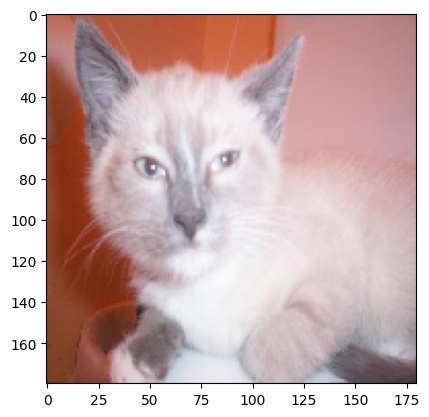

In [82]:



#img = keras.utils.load_img("PetImages/Dog/6743.jpg", target_size=image_size)

img = keras.utils.load_img("PetImages/Cat/1795.jpg", target_size=image_size)



plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(keras.ops.sigmoid(predictions[0][0]))



print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% dog.")



# **Improvements Over Original Code**


---


* Reusable: Can call predict_image(model, path) for any image.

* Preprocessing built-in: Resizing and normalization match your model training.

* Visualization: Automatically shows the image with prediction.

* Clear outputs: Returns both label (Cat or Dog) and probability.

* Handles single image prediction cleanly without manual tensor manipulations.

In [ ]:
# @title Default title text

# Define a reusable prediction function
def predict_image(model, img_path, image_size=(180, 180), show_image=True):
    """
    Predict whether the image is a cat or dog.

    Args:
        model: Trained Keras model
        img_path: Path to the image
        image_size: Size to resize the image (height, width)
        show_image: Whether to display the image using plt.imshow

    Returns:
        class_label: 'Cat' or 'Dog'
        probability: Probability of class 1 (Dog)
    """
    # Load and resize image
    img = keras.utils.load_img(img_path, target_size=image_size)
    img_array = keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize same as training

    # Make prediction
    logits = model.predict(img_array)
    prob = float(tf.nn.sigmoid(logits[0][0]))

    # Determine class label
    class_label = "Dog" if prob > 0.5 else "Cat"

    # Show image with title
    if show_image:
        plt.imshow(img)
        plt.title(f"{class_label} ({prob*100:.2f}% Dog, {(1-prob)*100:.2f}% Cat)")
        plt.axis('off')
        plt.show()

    return class_label, prob

# Example usage
img_path = "PetImages/Dog/9.jpg"
label, probability = predict_image(model, img_path, image_size=image_size)
print(f"Prediction: {label}, Probability of Dog: {probability:.2f}")




---



---



---



---



---



---



**✨ Features**

Automatically loops over all images in a folder.

Preprocesses each image (resize + normalize) just like in training.

Predicts Cat or Dog and probability of Dog.

Optional: displays each image with title showing prediction.

Returns a Pandas DataFrame for easy analysis, export, or filtering.



```
# This is formatted as code
```



In [ ]:

import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def predict_images_in_folder(model, folder_path, image_size=(180, 180), show_images=True):
    """
    Predict all images in a folder as Cat or Dog.

    Args:
        model: Trained Keras model
        folder_path: Path to folder containing images
        image_size: Size to resize images
        show_images: Whether to display images with predictions

    Returns:
        results_df: Pandas DataFrame with columns ['filename', 'class', 'probability_dog']
    """
    results = []

    # List all image files
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for img_file in image_files:
        img_path = os.path.join(folder_path, img_file)

        # Load and preprocess image
        img = keras.utils.load_img(img_path, target_size=image_size)
        img_array = keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)
        img_array = img_array / 255.0

        # Make prediction
        logits = model.predict(img_array)
        prob = float(tf.nn.sigmoid(logits[0][0]))
        class_label = "Dog" if prob > 0.5 else "Cat"

        # Append results
        results.append({
            'filename': img_file,
            'class': class_label,
            'probability_dog': prob
        })

        # Show image if desired
        if show_images:
            plt.imshow(img)
            plt.title(f"{class_label} ({prob*100:.2f}% Dog, {(1-prob)*100:.2f}% Cat)")
            plt.axis('off')
            plt.show()

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Example usage
folder_path = "PetImages/Cat"  # Or "PetImages/Dog"
results_df = predict_images_in_folder(model, folder_path, image_size=image_size, show_images=False)
print(results_df)
